# Results analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

from models import OneShotCNN, OneShotTransferCNN, OneShotAutoencoder

plt.style.use("dark_background")

C:\Users\s100385\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
def plot_accuracies(approach="CNN"):    
    scores = pd.read_csv("../Results/OneShot" + str(approach) + "_scores_log.csv")
    scores.mean(axis=1).to_frame().reset_index().plot.scatter(x="index", y=0)
    plt.show() 

In [ ]:
def print_best_params(approach="CNN"):
    params = pd.read_csv("../Results/OneShot" + str(approach) + "_params_log.csv")
    scores = pd.read_csv("../Results/OneShot" + str(approach) + "_scores_log.csv")
    idx = scores.mean(axis=1).idxmax()
    
    if approach=="CNN":
        model = OneShotCNN()
    elif approach=="TransferCNN":
        model = OneShotTransferCNN()
    elif approach=="Autoencoder":
        model = OneShotAutoencoder()
    else: 
        print("Approach does not exist")
    
    best_params = params.iloc[idx, :]
    for i in range(len(model.hyperparams)):
        print(model.hyperparams[i] + ": " + best_params[i])

In [ ]:
print_best_params(approach="CNN")

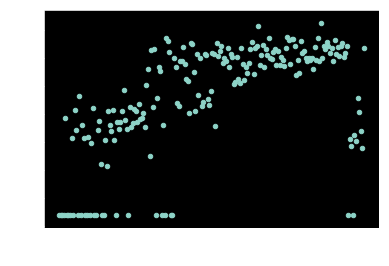

In [4]:
plot_accuracies()

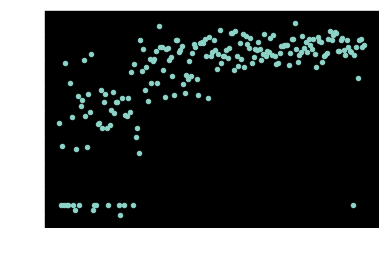

In [5]:
plot_accuracies("TransferCNN")

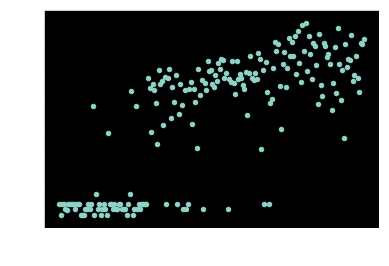

In [6]:
plot_accuracies("Autoencoder")

Find out why AE approach has such a slow start